<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [767]:
# Isi dengan data diri Anda
NAMA = "Valencius Apriady Primayudha"
KELAS = "D"
NPM = "2106750830"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [768]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valencius Apriady Primayudha dari kelas D dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valencius Apriady Primayudha)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [769]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [770]:
dfRedWineTrain = pd.read_csv('Red_Wine_Quality_Train.csv')
dfRedWineTest = pd.read_csv('Red_Wine_Quality_Test.csv')



In [771]:
total_rows_redWine, total_attributes_redWine = dfRedWineTrain.shape
print('Jumlah data train Redwine :', total_rows_redWine)
print("Jumlah atribut data train Redwine:", total_attributes_redWine)

dfRedWineTrain.head()

Jumlah data train Redwine : 3466
Jumlah atribut data train Redwine: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5


In [772]:
dfRedWineTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3466 non-null   float64
 1   volatile acidity      3466 non-null   float64
 2   citric acid           3466 non-null   float64
 3   residual sugar        3466 non-null   float64
 4   chlorides             3466 non-null   float64
 5   free sulfur dioxide   3466 non-null   float64
 6   total sulfur dioxide  3466 non-null   float64
 7   density               3466 non-null   float64
 8   pH                    3466 non-null   float64
 9   sulphates             3466 non-null   float64
 10  alcohol               3466 non-null   float64
 11  quality               3466 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 325.1 KB


In [773]:
dfRedWineTrain.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000
mean,8.348834,0.583349,0.273910,2.577768,0.089961,13.495787,36.819734,0.996488,3.326449,0.660302,10.719217,5.504616
std,1.685407,0.242381,0.204169,1.231235,0.047654,9.763083,28.441789,0.001901,0.155002,0.159762,1.184774,1.706149
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.403343,3.000000
25%,7.181250,0.388721,0.072523,1.931467,0.069837,6.000000,15.772135,0.995335,3.219348,0.550170,9.788012,4.000000
50%,8.000000,0.546287,0.265653,2.200000,0.078693,10.992790,27.636997,0.996498,3.320000,0.630000,10.550321,6.000000
75%,9.400000,0.722336,0.441431,2.751284,0.092000,18.000000,48.000000,0.997600,3.426453,0.747810,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [774]:
total_rows_redWine_test, total_attributes_redWine_test = dfRedWineTest.shape
print('Jumlah data test redwine:', total_rows_redWine_test)
print("Jumlah atribut test redwine:", total_attributes_redWine_test)

dfRedWineTest.head()

Jumlah data test redwine: 612
Jumlah atribut test redwine: 12


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4077,6.613020,0.368383,0.336781,1.967740,0.067420,26.419891,57.742494,0.992607,3.481273,0.704514,13.290271
1,4072,11.061741,0.305193,0.643087,2.488424,0.075846,6.000000,23.231528,0.997594,3.009791,0.868071,10.713341
2,4070,7.395133,0.371637,0.351814,2.446018,0.062133,15.000000,31.230090,0.995439,3.263451,0.787876,11.718142
3,4060,8.479104,0.474308,0.228908,2.176526,0.070556,36.469471,53.951832,0.994275,3.311832,0.706045,12.422185
4,4053,9.547942,0.305690,0.556586,2.777240,0.078862,5.886199,16.886199,0.996491,3.150000,0.889274,11.620339


In [775]:
dfRedWineTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    612 non-null    int64  
 1   fixed acidity         612 non-null    float64
 2   volatile acidity      612 non-null    float64
 3   citric acid           612 non-null    float64
 4   residual sugar        612 non-null    float64
 5   chlorides             612 non-null    float64
 6   free sulfur dioxide   612 non-null    float64
 7   total sulfur dioxide  612 non-null    float64
 8   density               612 non-null    float64
 9   pH                    612 non-null    float64
 10  sulphates             612 non-null    float64
 11  alcohol               612 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.5 KB


In [776]:
dfRedWineTest.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,2007.308824,8.443536,0.578937,0.280383,2.578461,0.088728,13.554367,36.584213,0.996595,3.327028,0.664640,10.739729
std,1178.211043,1.644699,0.251923,0.204964,1.035245,0.045034,9.711352,27.113391,0.001859,0.151733,0.168898,1.188877
min,2.000000,4.700000,0.120000,0.000000,1.200000,0.012000,3.000000,7.743297,0.990640,2.860000,0.332983,8.400000
25%,961.000000,7.276430,0.394313,0.072415,1.999027,0.070000,5.909976,16.000000,0.995455,3.219029,0.550000,9.704288
50%,1979.000000,8.184257,0.520744,0.286889,2.300000,0.078000,10.078975,27.000000,0.996600,3.315414,0.638828,10.624218
75%,3050.250000,9.450623,0.729228,0.458754,2.702474,0.090000,18.010803,48.338924,0.997721,3.440081,0.753307,11.599308
max,4077.000000,14.300000,1.553455,0.843232,8.800000,0.480386,53.000000,144.000000,1.002200,3.850000,1.980000,14.000000


### Dataset Admission Prediction

In [777]:
dfAdmissionTrain = pd.read_csv('Admission_Prediction_Train.csv')
dfAdmissionTest = pd.read_csv('admission_test.csv')


**Terapkan proses Read Dataset di bawah cell ini**

In [778]:
dfAdmissionTrain.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62


In [779]:
dfAdmissionTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         350 non-null    int64  
 1   Serial No.         350 non-null    int64  
 2   GRE Score          350 non-null    int64  
 3   TOEFL Score        350 non-null    int64  
 4   University Rating  350 non-null    int64  
 5   SOP                350 non-null    float64
 6   LOR                350 non-null    float64
 7   CGPA               350 non-null    float64
 8   Research           350 non-null    int64  
 9   Chance of Admit    350 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 27.5 KB


In [780]:
dfAdmissionTrain.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,252.054286,253.054286,316.631429,107.254286,3.097143,3.368571,3.485714,8.576343,0.562857,0.724086
std,141.359141,141.359141,10.944959,6.060906,1.156391,0.999218,0.919276,0.594902,0.496743,0.139665
min,1.000000,2.000000,293.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,134.250000,135.250000,309.000000,102.250000,2.000000,2.500000,3.000000,8.130000,0.000000,0.630000
50%,250.500000,251.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000,0.730000
75%,374.500000,375.500000,324.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [781]:
dfAdmissionTest.head()

,Id,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,497,498,330,120,5,4.5,5.0,9.56,1
1,495,496,332,108,5,4.5,4.0,9.02,1
2,494,495,301,99,3,2.5,2.0,8.45,1
3,491,492,297,99,4,3.0,3.5,7.81,0
4,490,491,307,105,2,2.5,4.5,8.12,1


In [782]:
dfAdmissionTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Serial No.         150 non-null    int64  
 2   GRE Score          150 non-null    int64  
 3   TOEFL Score        150 non-null    int64  
 4   University Rating  150 non-null    int64  
 5   SOP                150 non-null    float64
 6   LOR                150 non-null    float64
 7   CGPA               150 non-null    float64
 8   Research           150 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 10.7 KB


In [783]:
dfAdmissionTest.describe()

,Id,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,243.540000,244.540000,316.100000,107.046667,3.153333,3.386667,3.480000,8.576667,0.553333
std,151.837808,151.837808,12.102887,6.148429,1.115700,0.974760,0.942793,0.629367,0.498813
min,0.000000,1.000000,290.000000,93.000000,1.000000,1.000000,1.000000,7.210000,0.000000
25%,93.250000,94.250000,307.000000,103.000000,2.000000,2.500000,3.000000,8.120000,0.000000
50%,248.000000,249.000000,316.500000,106.000000,3.000000,3.500000,3.500000,8.550000,1.000000
75%,373.250000,374.250000,325.750000,111.000000,4.000000,4.000000,4.000000,9.095000,1.000000
max,497.000000,498.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.870000,1.000000


## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

**Menangani duplicated value**

In [784]:
#Jumlah datang yang redundan pada dataset train
print("jumlah data yang rendundan:", dfRedWineTrain.duplicated().sum())

jumlah data yang rendundan: 242


In [785]:
# Menangani redundansi data
dfRedWineTrain.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [786]:
#Jumlah datang yang redundan pada dataset train
print("jumlah data yang redundan:", dfRedWineTest.duplicated().sum())

jumlah data yang redundan: 0


**Menangani null value**

In [787]:
# Mendeteksi kehadiran missing value pada dataset train
col_na_train = dfRedWineTrain.isnull().sum()
print(col_na_train)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [788]:
# Mendeteksi kehadiran missing value pada dataset test
col_na_test = dfRedWineTest.isnull().sum()
print(col_na_test)

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


**Menangani outlier**

In [789]:
Attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Melihat outlier yang terdapat pada masing-masing atribut dengan menggunakan box plot

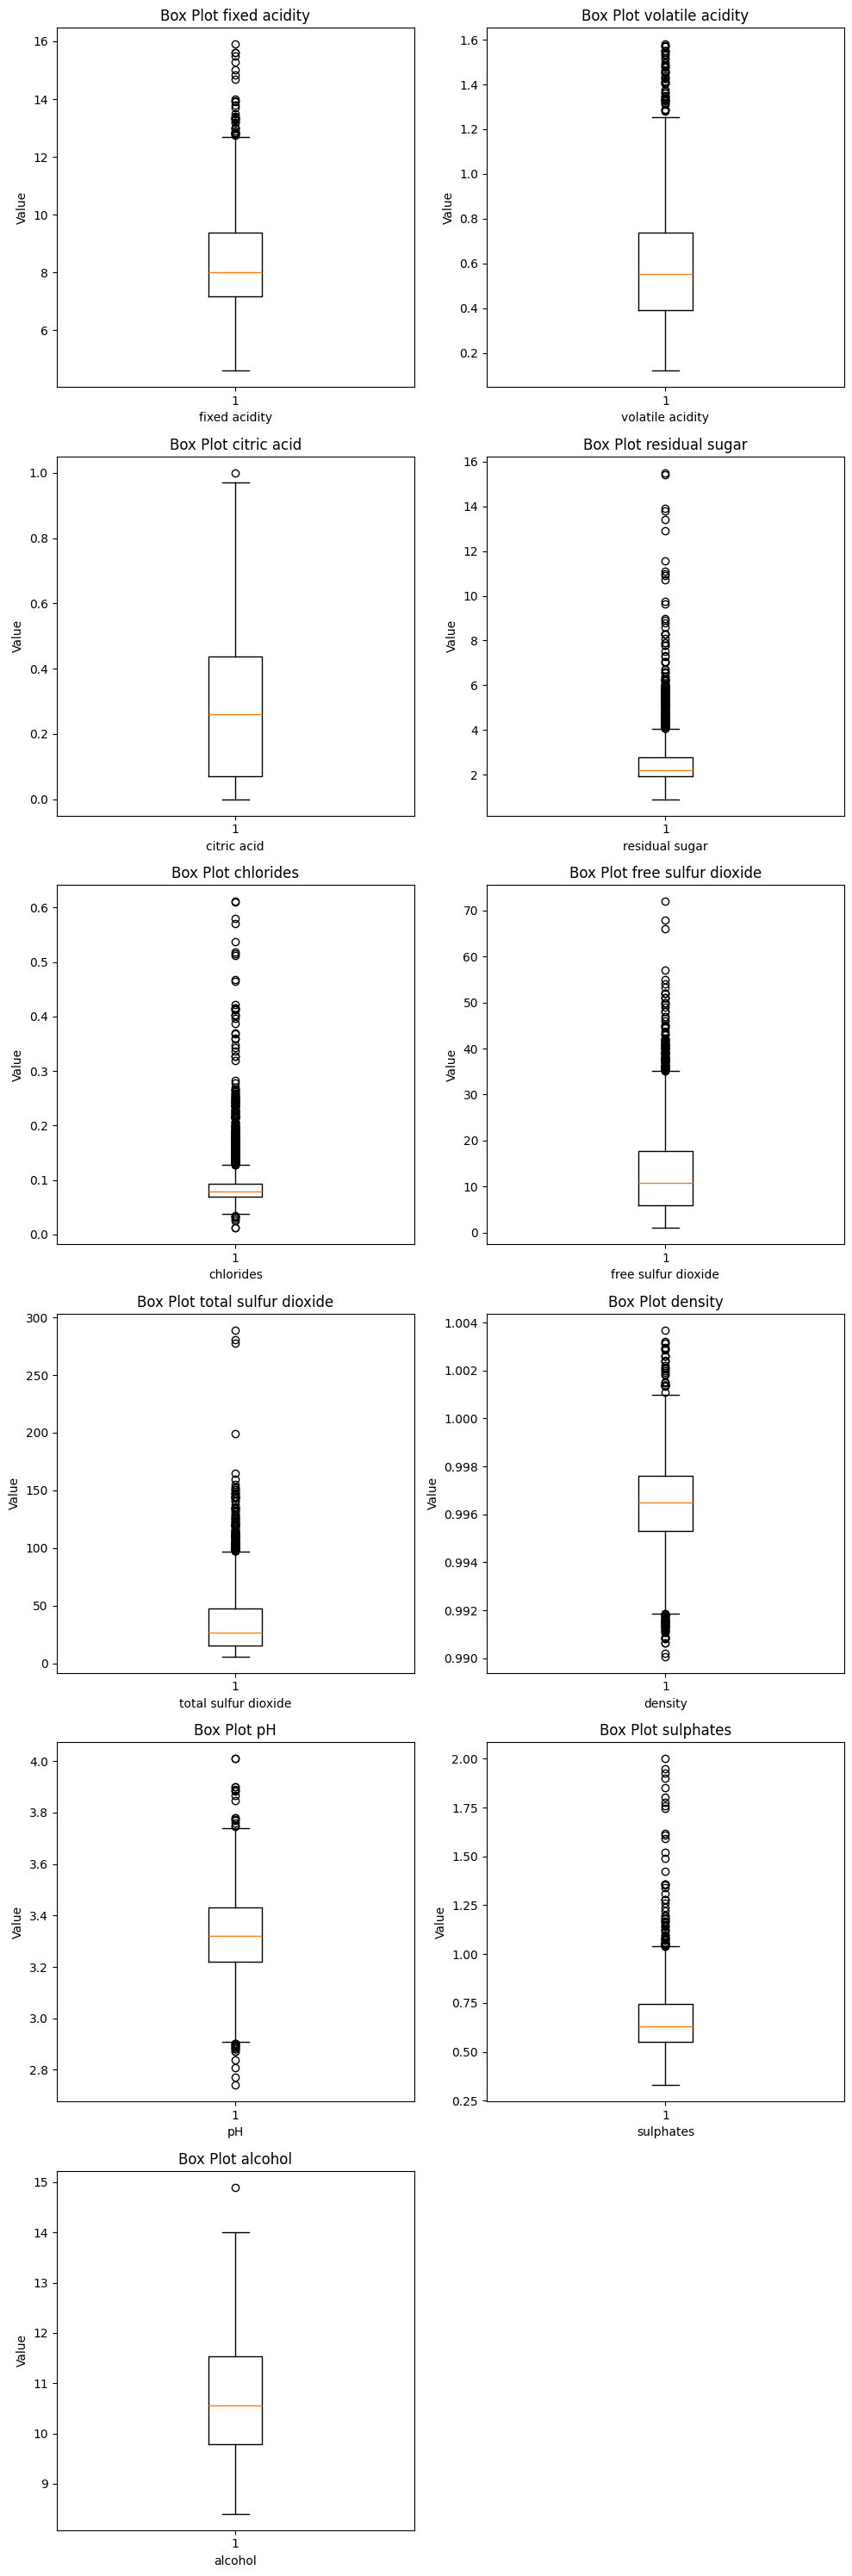

In [790]:
plt.figure(figsize=(10, 30))  # Adjust the figure size as needed

# Create the first box plot for 'Price'
counter = 1
for attr in Attributes:
    plt.subplot(6, 2, counter)
    plt.boxplot(dfRedWineTrain[attr])
    plt.title('Box Plot '+ attr)
    plt.xlabel(attr)
    plt.ylabel('Value')
    counter = counter+1


plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

Melihat ouliter pada dataset test

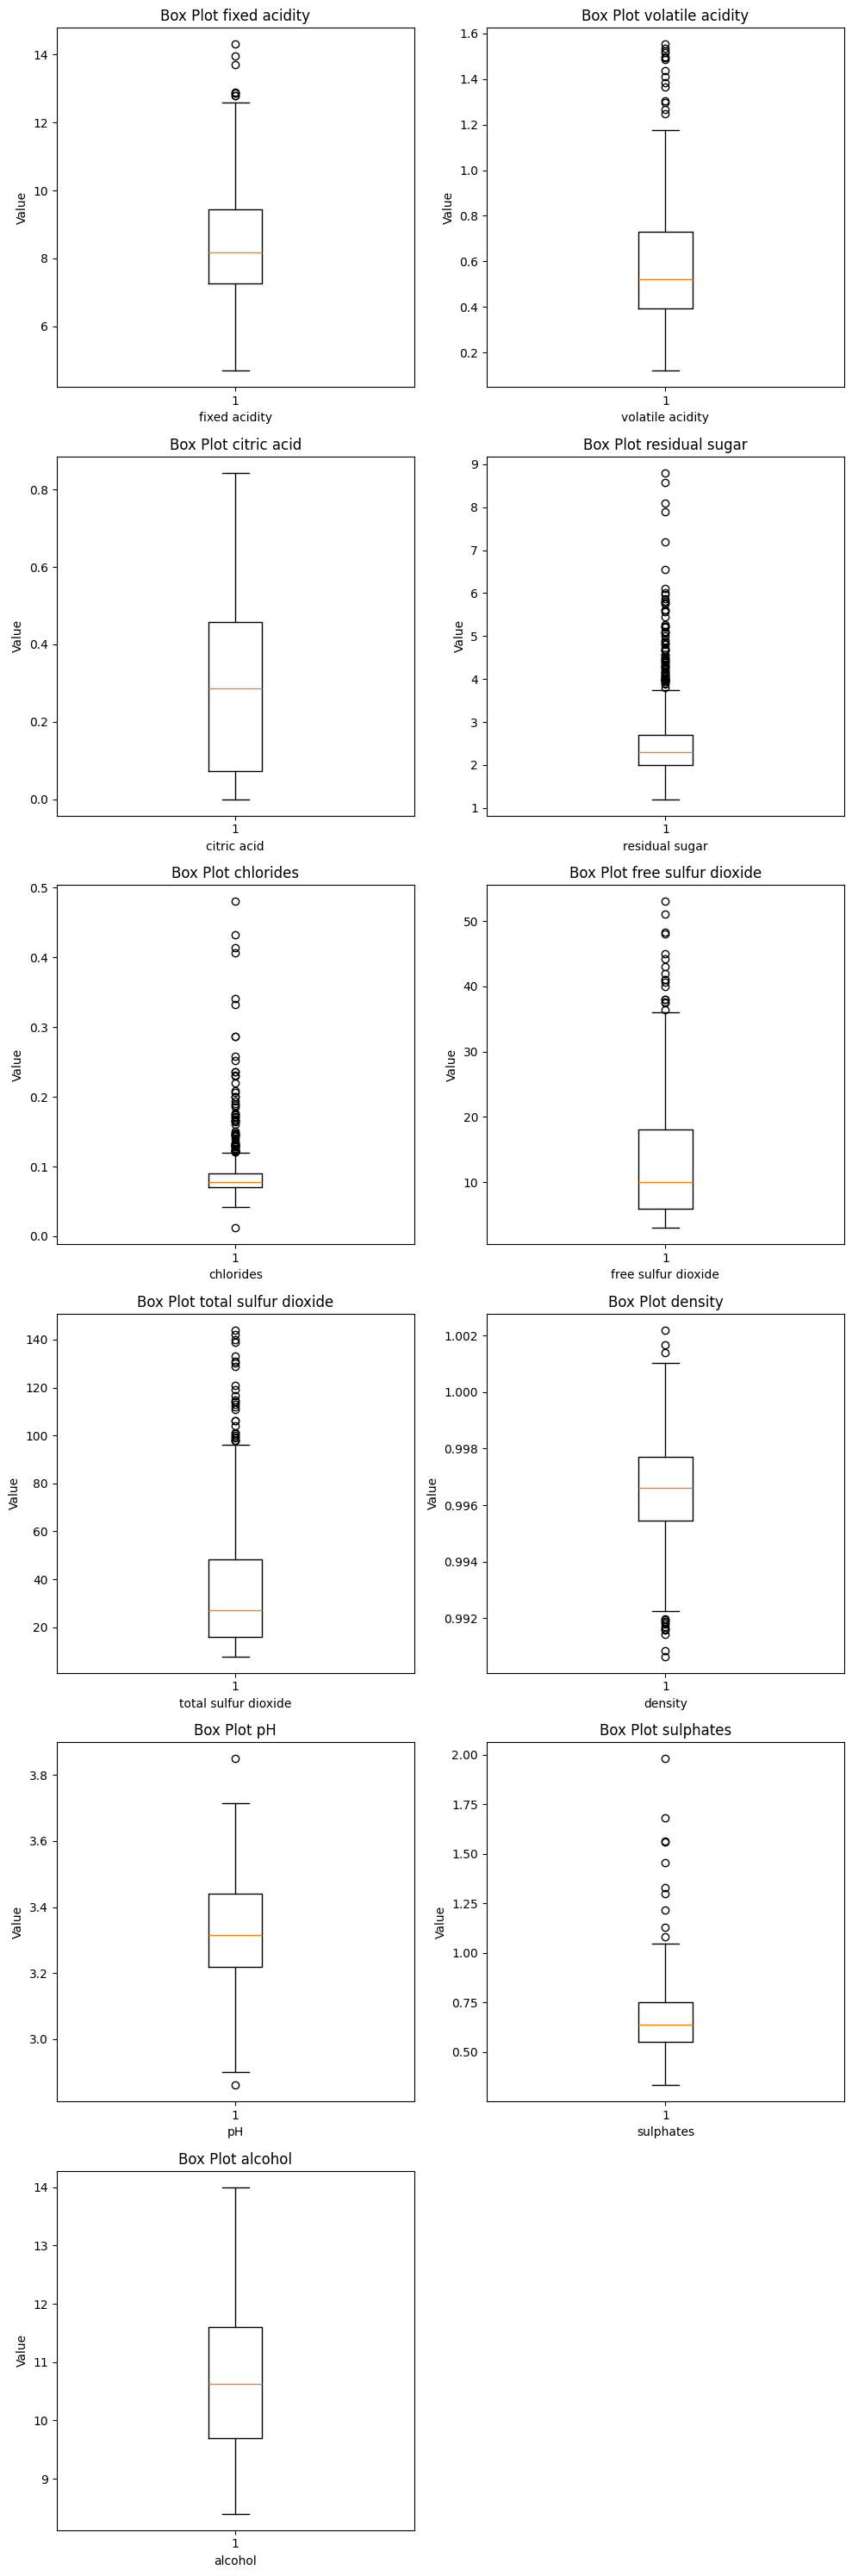

In [791]:
plt.figure(figsize=(10, 30))  # Adjust the figure size as needed

# Create the first box plot for 'Price'
counter = 1
for attr in Attributes:
    plt.subplot(6, 2, counter)
    plt.boxplot(dfRedWineTest[attr])
    plt.title('Box Plot '+ attr)
    plt.xlabel(attr)
    plt.ylabel('Value')
    counter = counter+1


plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

Dikarenakan dengan proses penghapusan outlier nilai prediksi yang dihasilkan tidak terlalu baik, maka proses untuk menangani outlier di bawah tidak dijalankan

In [792]:
# outliers = set()

# for attr in Attributes:
#     q1, q3 = np.percentile(dfRedWineTest[attr], [25, 75])
#     iqr = q3-q1
#     upperbound = q3 + iqr * 1.5
#     lowerbound = q1 - iqr * 1.5
#     maskOutlier = (dfRedWineTrain[attr] > upperbound) | (dfRedWineTrain[attr] < lowerbound)
    
#     median_value = dfRedWineTrain.loc[~maskOutlier, attr].median()
    
#     dfRedWineTrain.loc[maskOutlier, attr] = median_value



### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

**Menangani duplicated value**

In [793]:
#Jumlah data yang redundan pada dataset train
print("jumlah data yang rendundan:", dfAdmissionTrain.duplicated().sum())

jumlah data yang rendundan: 0


In [794]:
#Jumlah data yang redundan pada dataset test
print("jumlah data yang rendundan:", dfAdmissionTest.duplicated().sum())

jumlah data yang rendundan: 0


**Menangani atribut yang memiliki informasi kurang penting**

Menghapus atribut pertama yang tidak memiliki nama pada dataset admission train. Hal tersebut dikarenakan nilai dari atribut tersebut adalah nilai pada atribut nomor serial yang dukurang 1 dan tidak memberikan informasi tambahan apa-apa

In [795]:
# Menghapus atribut pertama dataframe admission
dfAdmissionTrain.drop(['Unnamed: 0'], axis=1, inplace=True)

Pada dataset test juga kita akan menghapus atribut Id dimana value yang disimpan mirip seperti serial No yang dikurang 1 sehingga tidak memberikan informasi apa-apa

In [796]:
dfAdmissionTest.drop(['Id'], axis=1, inplace=True)

**Menangani null value**

In [797]:
col_na_train = dfAdmissionTrain.isnull().sum()
col_na_train

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [798]:
col_na_test = dfAdmissionTest.isnull().sum()
col_na_test

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [799]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [800]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [801]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
xRedwineTrain, xRedwineTest, yRedwineTrain, yRedwineTest = train_test_split(dfRedWineTrain.drop(columns=['quality']), dfRedWineTrain['quality'], test_size=0.2, random_state=42)


dtc_red = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_red.fit(xRedwineTrain, yRedwineTrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [802]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
xAdmissionTrain, xAdmissionTest, yAdmissionTrain, yAdmissionTest = train_test_split(dfAdmissionTrain.drop(columns=['Serial No.','Chance of Admit']), dfAdmissionTrain['Chance of Admit'], test_size=0.2, random_state=42)


dtr_admission = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_admission.fit(xAdmissionTrain, yAdmissionTrain)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [803]:
# Memprediksi data testing
prediction = dtc_red.predict(xRedwineTest)

# Call the metrics function
classification_metrics(prediction, yRedwineTest)

Accuracy: 0.4558139534883721
F1 Score: 0.3636677472975333
Recall Score: 0.45411405907213837
Precision Score: 0.3956786348662779


d:\kuliah\kasdad\lab4\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Dataset Admission Prediction

In [804]:
# Memprediksi data testing
prediction = dtr_admission.predict(xAdmissionTest)

# Call the metrics function
regression_metrics(prediction, yAdmissionTest)

MAE: 0.05986515898240107
MSE: 0.005800921525014944
RMSE: 0.07616378092646757
R_squared: 0.6376365279751508


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [805]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(xAdmissionTrain, yAdmissionTrain)

# Memprediksi data testing
predicted6 = dtr_md6.predict(xAdmissionTest)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, yAdmissionTest)

MAE: 0.06393043147328863
MSE: 0.008073586762933677
RMSE: 0.08985313997258904
R_squared: 0.4956710035647356


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [806]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(xAdmissionTrain, yAdmissionTrain)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(xAdmissionTrain.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- GRE Score <= 301.00
|   |   |   |   |   |--- GRE Score <= 298.50
|   |   |   |   |   |   |--- LOR  <= 2.75
|   |   |   |   |   |   |   |--- SOP <= 2.25
|   |   |   |   |   |   |   |   |--- TOEFL Score <= 98.50
|   |   |   |   |   |   |   |   |   |--- TOEFL Score <= 97.00
|   |   |   |   |   |   |   |   |   |   |--- LOR  <= 1.75
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |   |   |--- LOR  >  1.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- TOEFL Score >  97.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |   |   |--- TOEFL Score >  98.50
|   |   |   |   |   |   |   |   |   |--- value: [0.37]
|   |   |   |   |   |   |   |--- SOP >  2.25
|   |   |   |   |   |   |   |   |--- value: [0.34]
|   |   |   |   | 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [807]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(xAdmissionTrain, yAdmissionTrain)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(xAdmissionTrain.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  305.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.34
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- CGPA >  8.34
|   |   |   |--- GRE Score <= 306.50
|   |   |   |   |--- value: [0.65]
|   |   |   |--- GRE Score >  306.50
|   |   |   |   |--- value: [0.73]
|--- CGPA >  8.93
|   |--- CGPA <= 9.18
|   |   |--- CGPA <= 9.05
|   |   |   |--- GRE Score <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- GRE Score >  311.00
|   |   |   |   |--- value: [0.80]
|   |   |--- CGPA >  9.05
|   |   |   |--- University 

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

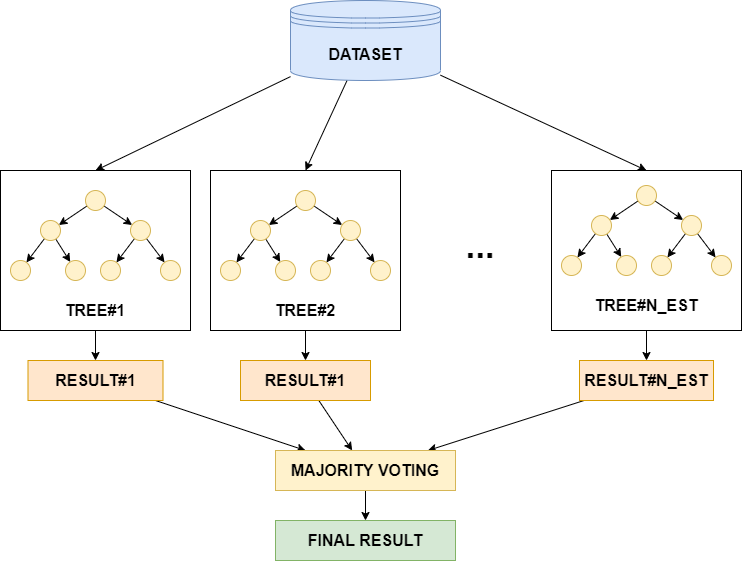

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [808]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(xAdmissionTrain, yAdmissionTrain)

# Memprediksi data testing
predicted = rf_md.predict(xAdmissionTest)

# Menampilkan metrics
regression_metrics(predicted, yAdmissionTest)

MAE: 0.049248571428571454
MSE: 0.004539823142857139
RMSE: 0.06737820970356172
R_squared: 0.7164129751918618


In [809]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(xRedwineTrain, yRedwineTrain)

predicted = rf_red_paramless.predict(xRedwineTest)

classification_metrics(predicted, yRedwineTest)

Accuracy: 0.827906976744186
F1 Score: 0.7967325819324702
Recall Score: 0.8028667040487693
Precision Score: 0.7964990830993656


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [810]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(xAdmissionTrain, yAdmissionTrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [811]:
clf.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 20}

In [812]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(xAdmissionTrain, yAdmissionTrain)
predicted = best_hp.predict(xAdmissionTest)
regression_metrics(predicted, yAdmissionTest)

MAE: 0.05850125734504328
MSE: 0.00677990531436717
RMSE: 0.0823401804368145
R_squared: 0.5764828020652314


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [813]:
#CODE HERE
dtcRedwine2 = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtcRedwine2.fit(xRedwineTrain, yRedwineTrain)

DecisionTreeClassifier(max_depth=4, random_state=2023)

In [814]:
dtrAdmission2 = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtrAdmission2.fit(xAdmissionTrain, yAdmissionTrain)

DecisionTreeRegressor(max_depth=4, random_state=2023)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [815]:
#CODE HERE
# Decision tree classifier
print(tree.export_text(dtcRedwine2, feature_names=pd.Series(xRedwineTrain.columns).array))

|--- sulphates <= 0.64
|   |--- chlorides <= 0.11
|   |   |--- volatile acidity <= 0.75
|   |   |   |--- alcohol <= 10.13
|   |   |   |   |--- class: 5
|   |   |   |--- alcohol >  10.13
|   |   |   |   |--- class: 4
|   |   |--- volatile acidity >  0.75
|   |   |   |--- residual sugar <= 3.15
|   |   |   |   |--- class: 4
|   |   |   |--- residual sugar >  3.15
|   |   |   |   |--- class: 3
|   |--- chlorides >  0.11
|   |   |--- fixed acidity <= 6.71
|   |   |   |--- alcohol <= 10.09
|   |   |   |   |--- class: 4
|   |   |   |--- alcohol >  10.09
|   |   |   |   |--- class: 5
|   |   |--- fixed acidity >  6.71
|   |   |   |--- volatile acidity <= 0.59
|   |   |   |   |--- class: 6
|   |   |   |--- volatile acidity >  0.59
|   |   |   |   |--- class: 3
|--- sulphates >  0.64
|   |--- alcohol <= 11.00
|   |   |--- alcohol <= 9.90
|   |   |   |--- total sulfur dioxide <= 48.83
|   |   |   |   |--- class: 3
|   |   |   |--- total sulfur dioxide >  48.83
|   |   |   |   |--- class: 5
|   |

In [816]:
from sklearn.tree import plot_tree
import graphviz
# Decission tree regressor
print(tree.export_text(dtrAdmission2, feature_names=pd.Series(xAdmissionTrain.columns).array))


|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  305.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.34
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- CGPA >  8.34
|   |   |   |--- GRE Score <= 306.50
|   |   |   |   |--- value: [0.65]
|   |   |   |--- GRE Score >  306.50
|   |   |   |   |--- value: [0.73]
|--- CGPA >  8.93
|   |--- CGPA <= 9.18
|   |   |--- CGPA <= 9.05
|   |   |   |--- GRE Score <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- GRE Score >  311.00
|   |   |   |   |--- value: [0.80]
|   |   |--- CGPA >  9.05
|   |   |   |--- University 

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

In [817]:
dtrAdmission2

DecisionTreeRegressor(max_depth=4, random_state=2023)

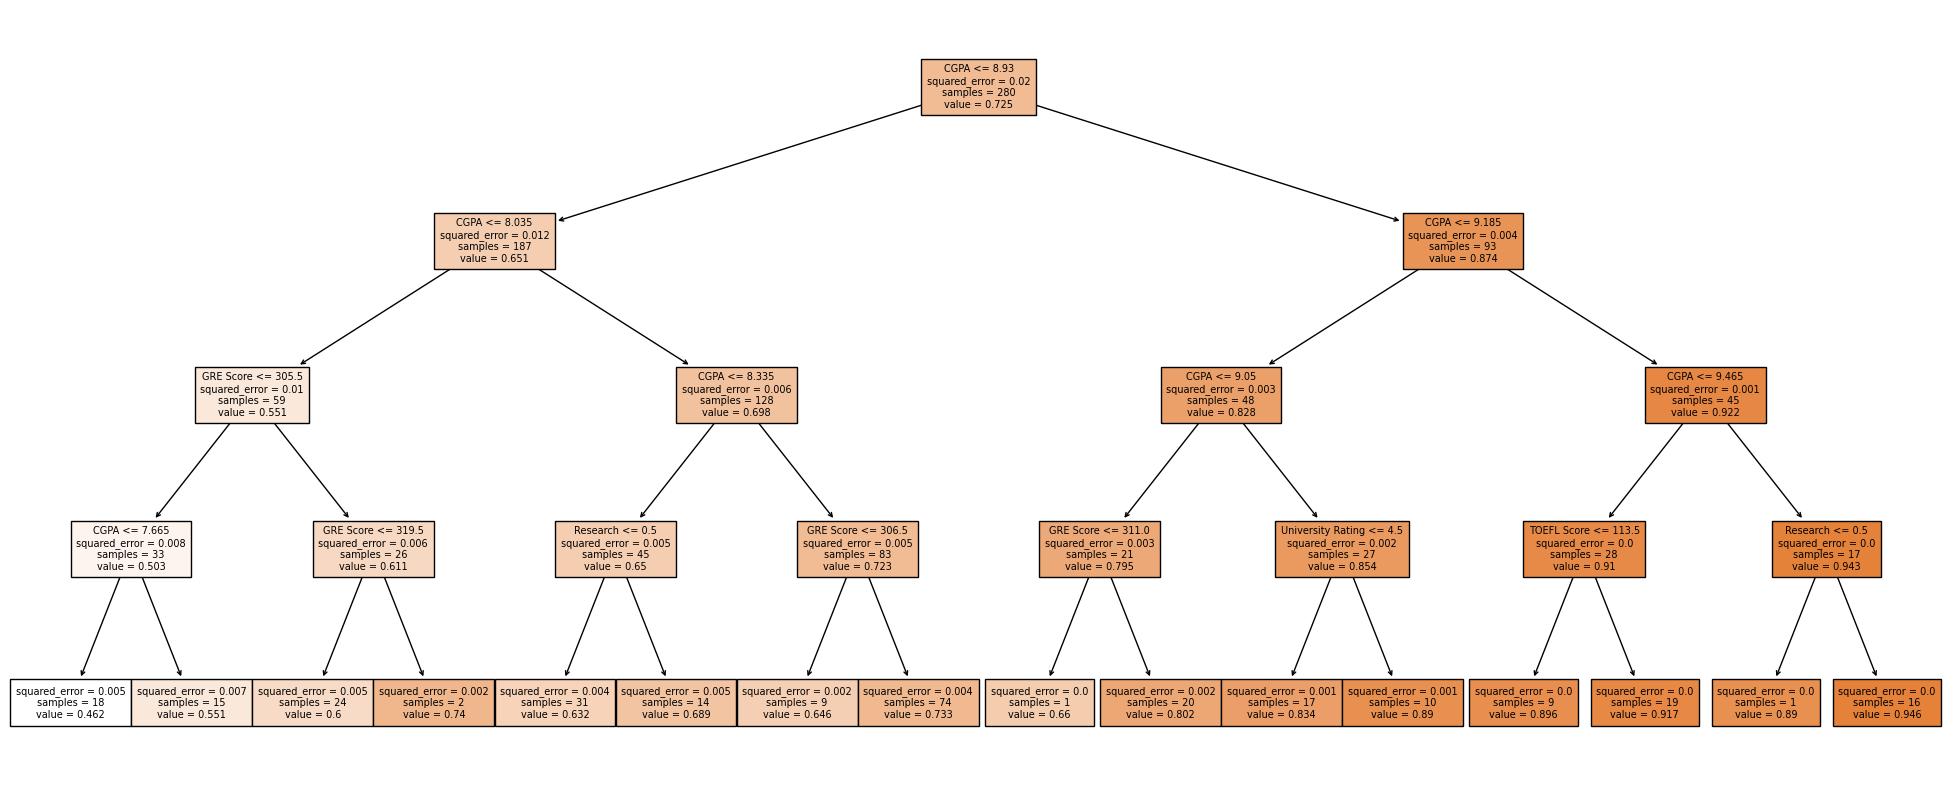

In [818]:

plt.figure(figsize=(25, 10))
plot_tree(dtrAdmission2, feature_names=xAdmissionTrain.columns, filled=True, fontsize=7)
plt.show()

In [819]:
result = dtrAdmission2.predict(xAdmissionTest)
mean_absolute_error(result, yAdmissionTest)

0.05421585146379021

Atribut-atribut yang akan menghasilkan prediksi terdekat:
- CGPA > 9.465
- Research > 0.5

Mean absolute error dari data aktual: 0.0466.. = 0.047

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

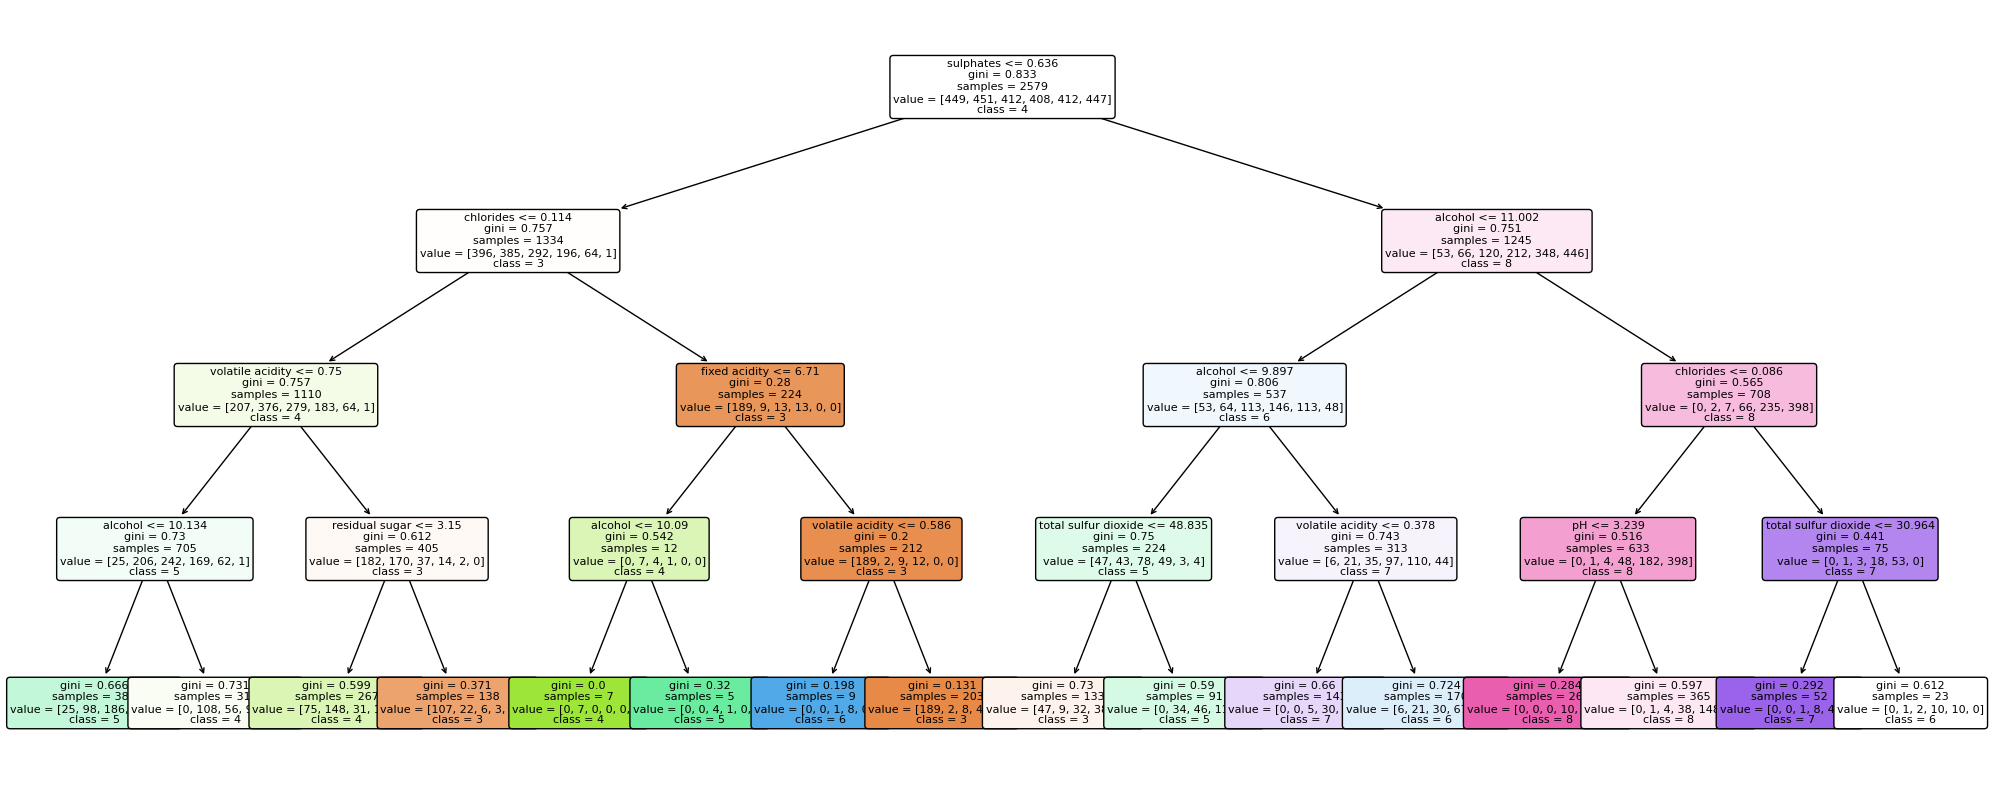

In [820]:
#CODE HERE
plt.figure(figsize=(25, 10))
plot_tree(dtcRedwine2, feature_names=xRedwineTrain.columns , filled=True, fontsize=8, class_names=dtcRedwine2.classes_.astype(str), rounded=True)
plt.show()

#### Kombinasi atribut yang menghasikan kelas 4:
---
- sulphates <= 0.636
- chlorides <= 0.114
- volatile acidity <= 0.75
- alcohol > 10.134
---
- sulphates <= 0.636
- chlorides <= 0.114
- volatile acidity > 0.75
- residual sugar <= 3.15
---
- sulphates <= 0.636
- chlorides > 0.114
- fixed acidity <=> 6.71
- alcohol <= 10.09

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [821]:
#CODE HERE
rfrAdmission = RandomForestRegressor(max_depth=3, random_state=2023)
rfrAdmission.fit(xAdmissionTrain, yAdmissionTrain)

result = rfrAdmission.predict(xAdmissionTest)

regression_metrics(result, yAdmissionTest)

MAE: 0.048693508324545304
MSE: 0.004113781838399358
RMSE: 0.06413877016594065
R_squared: 0.7430262995824067


In [822]:
#CODE HERE
rfcRedwine = RandomForestClassifier(max_depth=3, random_state=2023)
rfcRedwine.fit(xRedwineTrain, yRedwineTrain)

result = rfcRedwine.predict(xRedwineTest)

regression_metrics(result, yRedwineTest)

MAE: 0.5348837209302325
MSE: 0.8790697674418605
RMSE: 0.9375872052464562
R_squared: 0.719303483656258


### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

Model random forest didapatkan dari pembuatan banyak tree, saat training, yang kemudian kemudian keputusan akhirnya diambil dari hasil agreget dari semua tree yang sudah dibuat tersebut. Hal tersebut mengakibatkan interpretasi untuk random forest sangat sulit diinterpretasikan. Sedangkan penginterpretasian Decision tree hanyalah satu tree yang mana dibuat pada saat training dan hasilnya didapatkan dari tree tersebut juga. Selain itu, random forest juga memiliki unsur randomness dimana random forest membuat tree pada saat training dengan unsur yang acak. Tidak menentu atribut mana saja yang akan digunakan dan sampel mana saja yang akan diikutsertakan sehingga untuk diinterpretasikan tentunya akan jauh lebih sulit.

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

Dikarenakan metode Random Forest membuat banyak decision tree pada saat proses training nya maka tentunya prediksi yang dihasilkan tentunya juga banyak prediksi yang dihasilkan berdasarkan pengamatan masing-masing tree. Oleh karena itu keputusan akan diambil dengan melihat kelas mana yang paling sering keluar menjadi hasil prediksi dari tree yang ada (Majority Voting). Hal ini dilakukan untuk mencegah terjadinya overfitting dan menghasilkan model yang lebih stabil. Sedangkan untuk metode decision tree, dikarenakan tree yang dihasilkan hanya satu, maka pengambilan keputusannya adalah dengan mengikuti jalur yang sudah tersedia dan mulai mengikuti jalur dari root node ke leaf node sesuai dengan input yang didapatkan. Cara ini jauh lebih mudah dimengerti dan diinterpretasikan, namun cara ini memiliki kemungkinan yang cukup besar untuk terjadinya overfitting dan nilai varians yang lebih tinggi.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [823]:
# model pada soal no 2
dtrPrediction2 = dtrAdmission2.predict(xAdmissionTest)
regression_metrics(dtrPrediction2, yAdmissionTest)


MAE: 0.05421585146379021
MSE: 0.005105758906433273
RMSE: 0.07145459331934703
R_squared: 0.6810609285647609


In [824]:
# model pada soal no 3
dtrPrediction3 = rfrAdmission.predict(xAdmissionTest)
regression_metrics(dtrPrediction3, yAdmissionTest)

MAE: 0.048693508324545304
MSE: 0.004113781838399358
RMSE: 0.06413877016594065
R_squared: 0.7430262995824067


Dari hasil prediksi di atas, kita mendapat nilai Mean Absolute Error (MAE), Mean Squarred Error (MSE), Root Mean Squared Error (RMSE), dan R-Squared. 

Untuk nilai **MAE**, dikarenakan nilai tersebut menandakan nilai rata-rata absolut error yang dimiliki dari model yang didapat, maka semakin kecil nilainya akan semakin baik. Jika dilihat dari angka yang didapat di atas, maka niai MAE yang lebih kecil dimiliki oleh model no 3 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik


Nilai **MSE**, merupakan nilai rata-rata kuadrat kesalahan yang mengukur variasi prediksi dari nilai sebenarnya. Angka MSE yang dimiliki oleh model no 3 lebih kecil jika dibandingkan dengan model no 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2

Nilai **RMSE** memberikan angka besarnya variasi kesalahan pada model. Angka RMSE yang dimiliki oleh model no 3 lebih kecil jika dibandingkan dengan model no 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2

Nilai **R-squared** adalah nilai koefisien determinasi yang mengukur seluas apa varians data yang dapat dijelaskan. Angka R-squared pada model nomor 3 lebih besar jika dibandingkan dengan model nomor 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2.

Dari analisis yang sudah dilakukan di atas, maka secara keseluruhan kualitas prediksi yang dihasilkan oleh model no 3 akan lebih baik dari prediksi yang dihasilkan oleh model no 2 

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [825]:
#CODE HERE
dtcPrediction2 = dtcRedwine2.predict(xRedwineTest)
classification_metrics(dtcPrediction2, yRedwineTest)

Accuracy: 0.5286821705426357
F1 Score: 0.4889655740201934
Recall Score: 0.506508744817003
Precision Score: 0.5050523616977939


In [826]:
dtcPrediction3 = rfcRedwine.predict(xRedwineTest)
classification_metrics(dtcPrediction3, yRedwineTest)

Accuracy: 0.6093023255813953
F1 Score: 0.5504563569668698
Recall Score: 0.5843065085186309
Precision Score: 0.5722126373131003


Dari hasil prediksi di atas, kita mendapat nilai Accuracy, F1 Score, Recall Score, dan Precission Score. 

Nilai **Accuracy** adalah nilai rasio kebenaran model dalam memprediksi data. Jika dilihat dari hasil yang didapatkan di atas, prediksi yang dihasilkan oleh model no 3 memiliki nilai accuracy yang lebih besar. Artinya prediksi yang dihasilkan model no 3 memiliki jumlah benar yang lebih tinggi dari hasil prediksi yang dihasilkan model no 2 sehingga model no 3 kualitas prediksi yang dihasilkan model no 3 lebih tinggi dari model no 2. 


Nilai **F1 Score**, merupakan nilai rata-rata rata-rata harmonik dari precission dan recall. Angka F1 score yang dimiliki oleh model no 3 lebih besar jika dibandingkan dengan model no 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2

Nilai **Recall Score** memberikan nilai rasio positif sejati untuk jumlah total kasus positif sebenarnya (positif sejati dan false negative). Angka recall score yang dimiliki oleh model no 3 lebih besar jika dibandingkan dengan model no 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2

Nilai **Precission** adalah rasio positif sejati terhadap semua prediksi positif (positif sejati dan positif palsu). Angka precission pada model nomor 3 lebih besar jika dibandingkan dengan model nomor 2 sehingga prediksi yang akan dihasilkan oleh model no 3 akan lebih baik dibandingkan dengan model no 2.

Dari analisis yang sudah dilakukan di atas, maka secara keseluruhan kualitas prediksi yang dihasilkan oleh model no 3 akan lebih baik dari prediksi yang dihasilkan oleh model no 2 

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [827]:
#CODE HERE
parameterReg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'min_samples_split': [2, 5, 10, 30],
    'max_depth': [None, 5, 10, 15]
}

parameterClassifier = {
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [2, 5, 20, 40],
    'max_depth': [None, 5, 10, 15]
}

decTreeReg = DecisionTreeRegressor()
decTreeClassifier = DecisionTreeClassifier()
randTreeReg = RandomForestRegressor()
randTreeClassifier = RandomForestClassifier()

gridDecReg = GridSearchCV(estimator=decTreeReg, 
                          param_grid=parameterReg, cv=5)
gridDecClassifier = GridSearchCV(estimator=decTreeClassifier, 
                          param_grid=parameterClassifier, cv=5)
gridRandReg = GridSearchCV(estimator=randTreeReg, 
                           param_grid=parameterReg, cv=5)
gridRandClassifier = GridSearchCV(estimator=randTreeClassifier, 
                                  param_grid=parameterClassifier, cv=5)

gridDecReg.fit(xAdmissionTrain, yAdmissionTrain)
gridDecClassifier.fit(xRedwineTrain, yRedwineTrain)
gridRandReg.fit(xAdmissionTrain, yAdmissionTrain)
gridRandClassifier.fit(xRedwineTrain, yRedwineTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 20, 40]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [828]:
#CODE HERE
print("Hyperparameter terbaik untuk model Random Forest Regressor: ", gridRandReg.best_params_)
print("Hyperparameter terbaik untuk model Random Forest Classifier: ", gridRandClassifier.best_params_)
print("Hyperparameter terbaik untuk model Decision Tree Regressor: ", gridDecReg.best_params_)
print("Hyperparameter terbaik untuk model Decision Tree Classifier: ", gridDecClassifier.best_params_)


Hyperparameter terbaik untuk model Random Forest Regressor:  {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 5}
Hyperparameter terbaik untuk model Random Forest Classifier:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Hyperparameter terbaik untuk model Decision Tree Regressor:  {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 30}
Hyperparameter terbaik untuk model Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [829]:
bestRandClassifier = RandomForestClassifier(**gridRandClassifier.best_params_)
bestRandReg = RandomForestRegressor(**gridRandReg.best_params_)
bestDecClassifier = DecisionTreeClassifier(**gridDecClassifier.best_params_)
bestDecReg = DecisionTreeRegressor(**gridDecReg.best_params_)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [837]:
# Random tree classifier
bestRandClassifier.fit(xRedwineTrain, yRedwineTrain)
randClassifierResult = bestRandClassifier.predict(xRedwineTest)
classification_metrics(randClassifierResult, yRedwineTest) 


Accuracy: 0.8403100775193798
F1 Score: 0.8110154377454707
Recall Score: 0.8159114403611686
Precision Score: 0.8118836625320912


In [831]:
# Random Tree Regression
bestRandReg.fit(xAdmissionTrain, yAdmissionTrain)
randRegResult = bestRandReg.predict(xAdmissionTest)
regression_metrics(randRegResult, yAdmissionTest)

MAE: 0.0456557142857143
MSE: 0.004037672857142853
RMSE: 0.06354268531580054
R_squared: 0.7477805639835805


In [832]:
# Decision tree classifier
bestDecClassifier.fit(xRedwineTrain, yRedwineTrain)
decClassifierResult = bestDecClassifier.predict(xRedwineTest)
classification_metrics(decClassifierResult, yRedwineTest) 


Accuracy: 0.7689922480620155
F1 Score: 0.7419169720009405
Recall Score: 0.7442530522872516
Precision Score: 0.7406926013024502


In [833]:
# Decision tree Regression
bestDecReg.fit(xAdmissionTrain, yAdmissionTrain)
decRegResult = bestDecReg.predict(xAdmissionTest)
regression_metrics(decRegResult, yAdmissionTest) 


MAE: 0.05164285714285714
MSE: 0.0054575
RMSE: 0.07387489424696322
R_squared: 0.6590888809566304


## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

1. Bootstrapping adalah teknik dalam statistika di mana sampel data yang digunakan akan berbeda-beda dan beberapa sampel data akan digunakan secara berulang. Dalam kontek random forest, bootstrapping digunakan untuk menciptakan variansi data karena sifatnya yang mengambil sampel dengan penggantian dari dataset yang ada. Hal tersebut dimanfaatkan oleh random forest yang kemudian menghasilkan beragam decission tree untuk kombinasi sampel data masukan yang berbeda-beda

2. Hasil akhir prediksi yang didapat dari seluruh decision tree regressor kemudian akan dilakukan secara agregasi. Hasil prediksi dari setiap decision tree regresor kemudian akan digabungkan menjadi satu hasil akhir prediksi. Salah satu cara paling umum yang biasa digunakan adalah dengan rata-rata aritmatika dari hasil prediksi setiap decision tree yang digabungkan dengan agregasi. Tujuan dari dilakukannya metode ini adalah untuk mengurangi kemungkinan terjadinya overfitting.

3. Klasifikasi multi-kelas dengan random forest seperti pada kasus prediksi kelas Red Wine di atas dilakukan menggabungkan keputusan dari berbagai decision tree yang dibuat. Setiap decision tree yang akan dibangun kemudian akan memberikan prediksi kelas secara independen dimana masing-masing decision tree yang akan dibuat juga mendapatkan sampel data atau fitur yang berbeda-beda. Setiap decision tree memiilih satu kelas dari berbagai kelas target yang tersedia. Kemudian kelas target yang tersedia ini akan mendapatkan voting dari pilihan kelas setiap decision tree. Maka, kelas yang memiliki voting terbanyak akan menjadi kelas yang diprediksi oleh model (voting mayoritas).

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?

1. Untuk menghasilkan output yang konsisten, kita apat membuat suatu nilai awal yang acak untuk pembuatan bilangan acak. Hal tersebut berguna agar setiap kali bootstrapping dan feature selection memproduksi bilangan acak, maka urutan yang akan diikuti juga akan sama. Dengan begitu jika model dilatih dengan sampel data yang sama, maka hutan yang dihasilkan akan sama juga.

2. Scaling dan feature normalization untuk random forest tidak diperlukan. Hal tersebut dikarenakan random forest membuat keputusan dengan nilai batasan yang sudah ditetapkan, bukan dari perbedaan skala diantara fitur yang berbeda atau nilai absolut fitur. Hal tersebut mengakibatkan hasil prediksi yang akan dihasilkan tidak akan berubah jika skala data berubah

# Kaggle

In [834]:
regressionSubmission = RandomForestRegressor(**gridRandReg.best_params_)
regressionSubmission.fit(dfAdmissionTrain.drop(columns=['Serial No.', 'Chance of Admit']), dfAdmissionTrain['Chance of Admit'])
x_admission_train_reg = dfAdmissionTest.drop(columns=['Serial No.'], axis=1)
regression_result = regressionSubmission.predict(x_admission_train_reg)

regression_prediction_df = pd.DataFrame({
    'Id': dfAdmissionTest['Serial No.'] - 1,
    'Chance of Admit': regression_result
})

regression_prediction_df.to_csv('admissionPrediction.csv', index=False)

In [842]:
classifierSubmission = RandomForestClassifier(**gridRandClassifier.best_params_)
classifierSubmission.fit(dfRedWineTrain.drop(columns=['quality'], axis=1), dfRedWineTrain['quality'])

x_redwine_train_class = dfRedWineTest.drop(columns=['Id'], axis=1)
classifier_result = classifierSubmission.predict(x_redwine_train_class)

classifier_prediction_df = pd.DataFrame({
    "Id": dfRedWineTest["Id"],
    "quality": classifier_result
})

classifier_prediction_df.to_csv('classifierPrediction.csv', index=False)